In [1]:
# the usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# load the data
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,28,2006,12,360,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,13,1985,5,360,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,28,2008,7,360,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,28,2009,12,360,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,7,1996,8,360,11.27,8.89,10.22,1.00,31.37


In [4]:
# undestand the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  int64  
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  int64  
 5   Publisher     16598 non-null  int64  
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.4+ MB


In [5]:
# inspect independent columns
independent_columns = ['Year', 'Platform', 'Genre', 'Publisher']

In [6]:
# check unique values and count items in the columns
for each in independent_columns:
    unique_items = df[each].unique()
    num_unique_values = len(unique_items)
    print('------------------------------------------')
    print(f'{num_unique_values} - Unique values for {each}: {unique_items}')

------------------------------------------
41 - Unique values for Year: ['2006' '1985' '2008' '2009' '1996' '1989' '1984' '2005' '1999' '2007'
 '2010' '2013' '2004' '1990' '1988' '2002' '2001' '2011' '1998' '2015'
 '2012' '2014' '1992' '1997' '1993' '1994' '1982' '2003' '1986' '2000' nan
 '1995' '2016' '1991' '1981' '1987' '1980' '1983' '2020' 'Adventure'
 '2017']
------------------------------------------
33 - Unique values for Platform: [28 13  7  6 30 19 18 25  8  4 20 12 17 31 15  2 21 32  9 29 10  5 22 23
 24 27 14 26  0  3 11  1 16]
------------------------------------------
14 - Unique values for Genre: [12  5  7  8  6  4  9 10  0  2  1 13 11  3]
------------------------------------------
580 - Unique values for Publisher: [360 324 495 457  22 526  67 139 447 467  54   7  86 178 276 459 466 289
 543 550 530 138 427 546 145 348 386 215 489 165  18 293 127 579 297  92
 425 282  41 326 254 121  11 344 523 392 309 238 501 535  14 331 242 531
 464 534  24  64 110 379 426 540 220 199 

In [7]:
df["Name"].value_counts()

Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64

In [8]:
# we dont have any stirng values in the dataset thereby we are going to remvoe Name colum
df = df.drop("Name", axis= 1)

In [9]:
# search for nan values
df.isna().sum()

Rank              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [10]:
# Drop rows with missing values
df = df.dropna()

In [11]:
# search for dupilcates
df.duplicated().sum()

0

In [12]:
# search again for nan values
df.isna().sum()

Rank            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
# convert object type Year column to integers
df['Year'] = df["Year"].astype(np.int64)
df['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017], dtype=int64)

<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

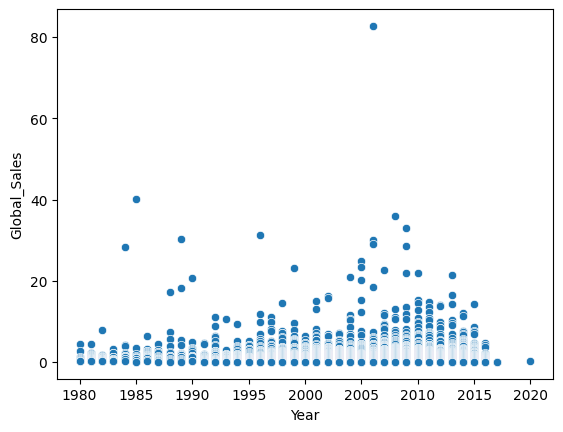

In [14]:
# distribution of Year against the Global sales
sns.scatterplot(data=df , x='Year', y='Global_Sales')

<AxesSubplot: xlabel='Genre', ylabel='Global_Sales'>

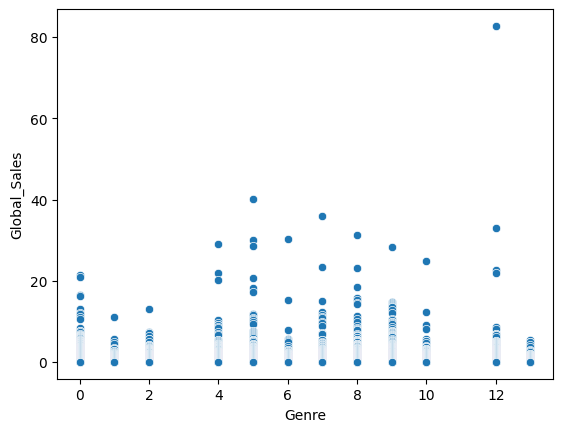

In [15]:
# distribution of Genre against the Global sales
sns.scatterplot(data=df , x='Genre', y='Global_Sales')

<AxesSubplot: xlabel='Publisher', ylabel='Global_Sales'>

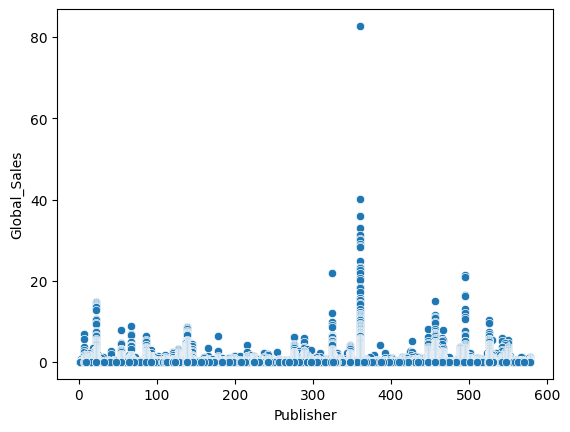

In [16]:
# distribution of Publisher against the Global sales
sns.scatterplot(data=df , x='Publisher', y='Global_Sales')

<AxesSubplot: xlabel='Platform', ylabel='Global_Sales'>

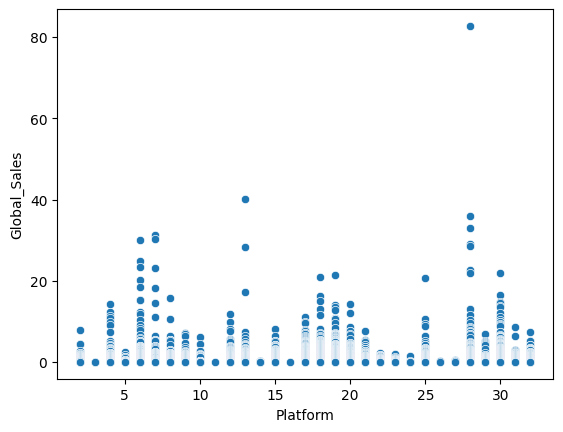

In [17]:
# distribution of Platform against the Global sales
sns.scatterplot(data=df , x='Platform', y='Global_Sales')

<AxesSubplot: >

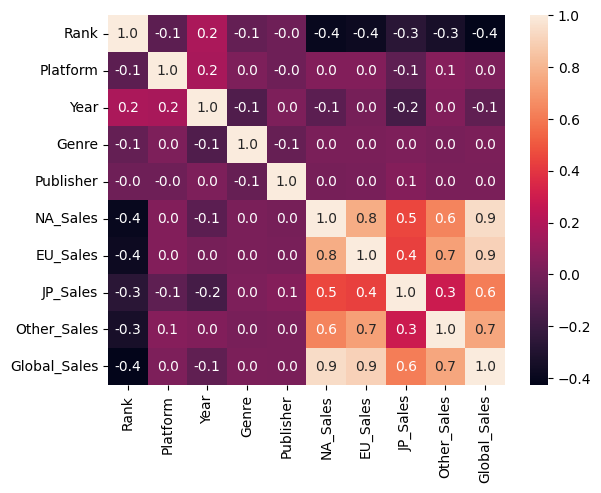

In [18]:
# get the correlation of the columns
corr = df.corr()
# visualize the correlations
sns.heatmap(data=corr, annot=True, fmt=".1f")

# there is no correlation between Global sales and Platform, Genre, Publisher, Year

In [19]:
 # print the columns so we can copy the other 
# columns into the X later easily
df.columns

Index(['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [20]:
# leave out the target variable! (dependent variable)
X = df[independent_columns]

# have only the target variable here (dependent variable)
y = df['Global_Sales']

In [21]:
 # create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
# create an empty linear regression model
# and fit it with out data 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
 # make test predictions with new data with our model
predictions = lm.predict(X_test)

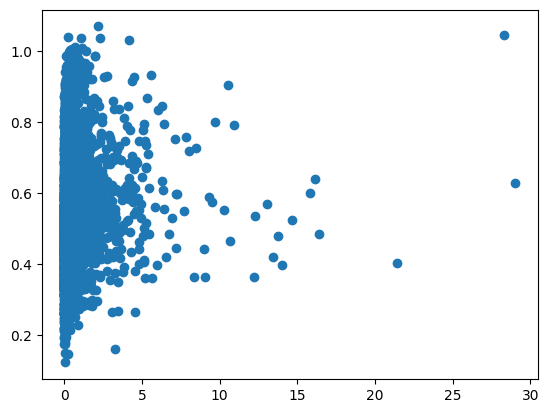

In [24]:
# these values follow a line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
# interesting idea to try, add a regression line:
# https://python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib/
plt.scatter(y_test, predictions)
plt.show()

In [25]:
df["Year"].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017], dtype=int64)

In [26]:
 # let's try with some new imaginary data
tester_row = {
    "Year":2006,
    "Platform": 28,
    "Genre":12,
    "Publisher": 360
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [27]:
# use our model to predict our tester_row data
result = lm.predict(tester_row)[0]

print()
print(f"Predicted Global Price:")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted Global Price:
0.69 $
----------------


In [28]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
0.58 $

MSE
1.68 $^2

RMSE:
1.3 $

R-squared:
0.01
